# Import

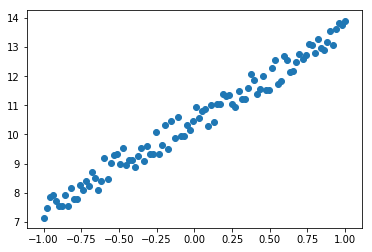

In [18]:
import torch
from torch.autograd import Variable
import numpy as np
import random
import matplotlib.pyplot as plt
from torch import nn

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # expand_dims
y = 3 * x + 10 + torch.rand(x.size())
# 上面这行代码是制造出接近y=3x+10的数据集，后面加上torch.rand()函数制造噪音

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()
# ---------------------
# 作者：Liam Coder
# 来源：CSDN
# 原文：https://blog.csdn.net/out_of_memory_error/article/details/81262309
# 版权声明：本文为博主原创文章，转载请附上博文链接！

In [12]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 输入和输出的维度都是1
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [15]:
# Loss & Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)  # model's weights

# Training

In [29]:
num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)

    # 向前传播
    out = model(inputs)
    loss = criterion(out, target)

    # 向后传播
    optimizer.zero_grad() # 注意每次迭代都需要清零
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print('Epoch[{0}/{1}], loss:{2}'.format(epoch + 1, num_epochs, loss.data))

Epoch[20/1000], loss:0.5260727405548096
Epoch[40/1000], loss:0.39098823070526123
Epoch[60/1000], loss:0.3040233254432678
Epoch[80/1000], loss:0.24489738047122955
Epoch[100/1000], loss:0.20304438471794128
Epoch[120/1000], loss:0.1725931018590927
Epoch[140/1000], loss:0.1500418335199356
Epoch[160/1000], loss:0.13315661251544952
Epoch[180/1000], loss:0.12042947113513947
Epoch[200/1000], loss:0.11079821735620499
Epoch[220/1000], loss:0.10349252820014954
Epoch[240/1000], loss:0.09794309735298157
Epoch[260/1000], loss:0.09372436255216599
Epoch[280/1000], loss:0.0905156061053276
Epoch[300/1000], loss:0.08807437121868134
Epoch[320/1000], loss:0.08621678501367569
Epoch[340/1000], loss:0.08480312675237656
Epoch[360/1000], loss:0.08372734487056732
Epoch[380/1000], loss:0.0829085186123848
Epoch[400/1000], loss:0.0822853296995163
Epoch[420/1000], loss:0.08181101083755493
Epoch[440/1000], loss:0.08145003765821457
Epoch[460/1000], loss:0.08117534220218658
Epoch[480/1000], loss:0.08096626400947571
Epo

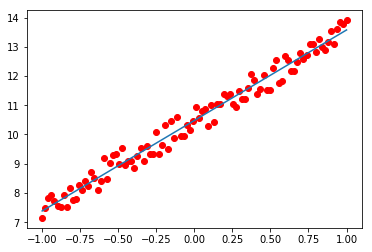

In [36]:
"""
特别注意的是需要用 model.eval()，让model变成测试模式，
这主要是对dropout和batch normalization的操作在训练和测试的时候是不一样的
"""
model.eval() # eval mode
model.train() # train mode
if torch.cuda.is_available():
    predict = model(Variable(x).cuda())
    predict = predict.data.cpu().numpy()
else:
    predict = model(Variable(x))
    predict = predict.data.numpy()
plt.plot(x.numpy(), y.numpy(), 'ro', label='Original Data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()